In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [34]:
def best_objective(l, f=min):
    r = [l[0]]
    for li in l[1:]:
        r.append(f(r[-1], li))
    return r

In [41]:
df = {}

# deephyper
df["deephyper-RF"] = pd.read_csv("exp/deephyper_rf/model-4-true-true-1/results.csv")
df["deephyper-RF"]["objective"] = np.exp(-df["deephyper-RF"]["objective"])

df["deephyper-GP"] = pd.read_csv("exp/deephyper_gp/model-4-true-true-1/results.csv")
df["deephyper-GP"]["objective"] = np.exp(-df["deephyper-GP"]["objective"])


# df["gptune"] = pd.read_csv("exp/gptune/model-4-true-true-1/results.csv")
# df["gptune"]["objective"] = np.exp(df["gptune"]["objective"])

# df["random"] = pd.read_csv("10k-samples/model-4-true-true/results.csv")
# df["random"]["objective"] = np.exp(-df["random"]["objective"])
df["deephyper-DUMMY"] = pd.read_csv("exp/deephyper_dummy/model-4-true-true-1/results.csv")
df["deephyper-DUMMY"]["objective"] = np.exp(-df["deephyper-DUMMY"]["objective"])

<IPython.core.display.Javascript object>


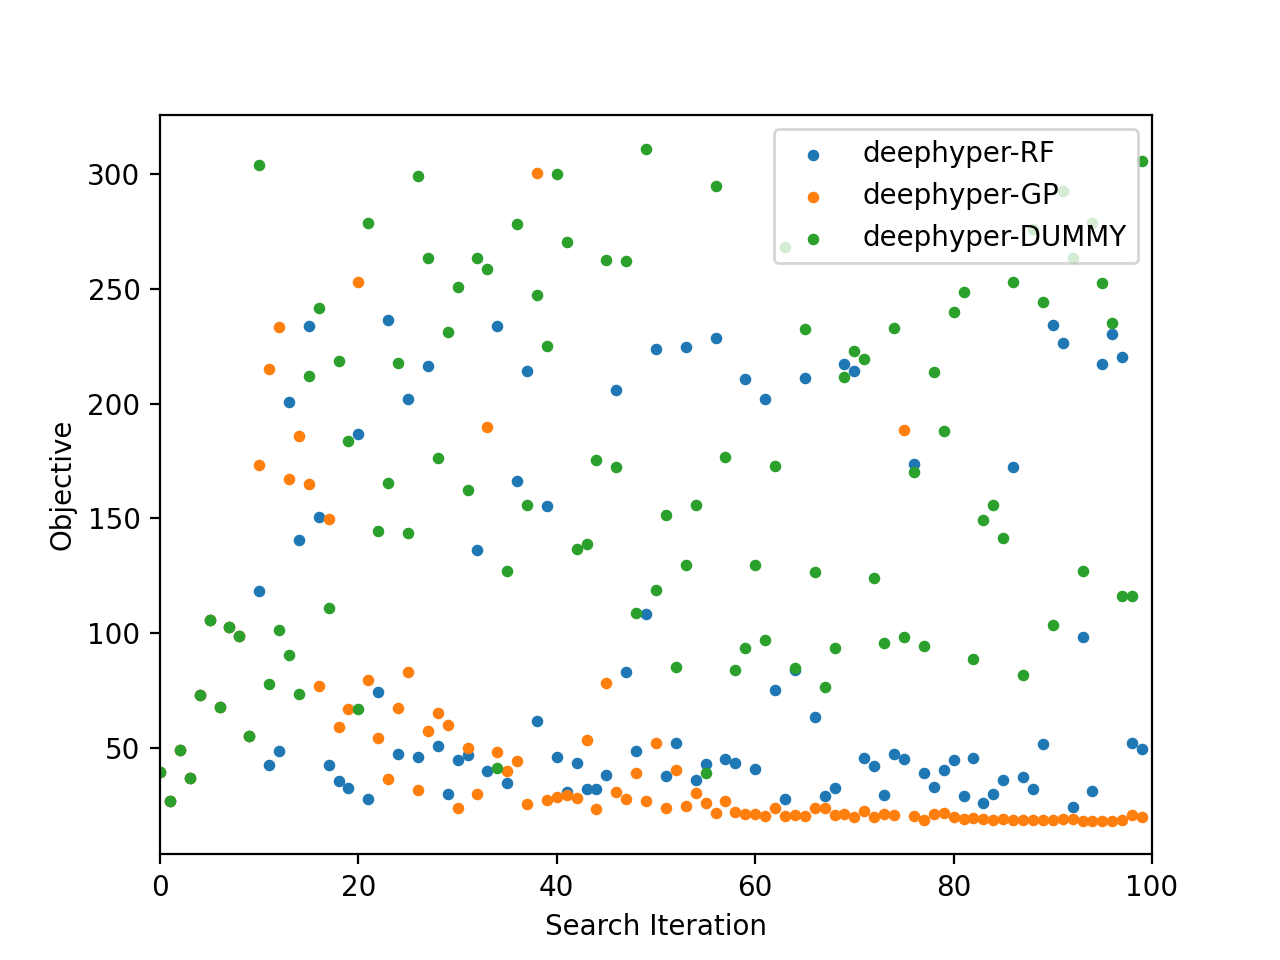

In [48]:
plt.figure()

for k, data in df.items():
    x = list(range(len(df[k]["objective"])))
    y = df[k]["objective"]
    plt.scatter(x, y, s=10, label=k)

plt.legend()
plt.xlim(0, 100)
plt.xlabel("Search Iteration")
plt.ylabel("Objective")
plt.show()

<IPython.core.display.Javascript object>


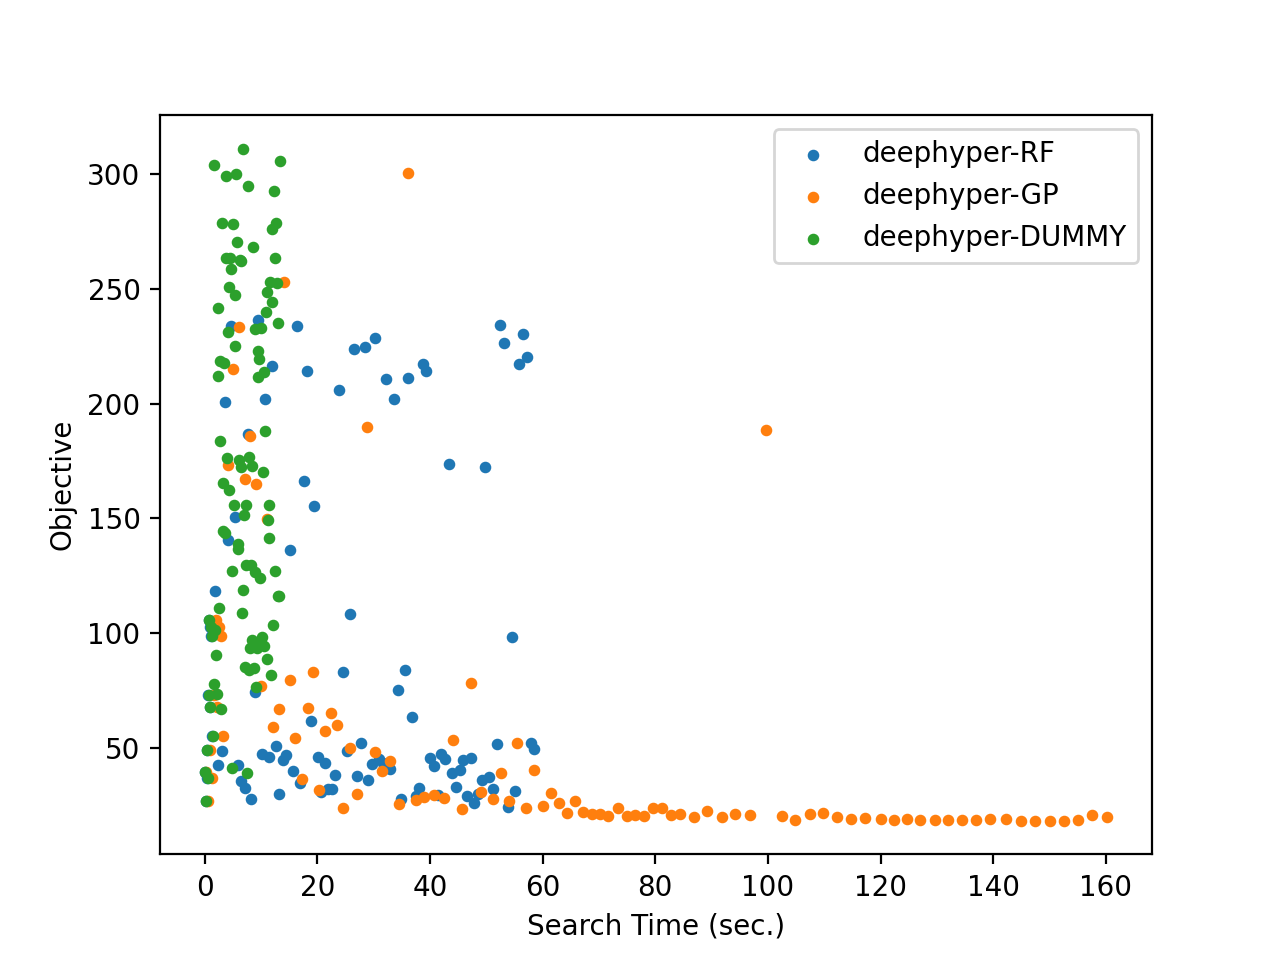

In [47]:
plt.figure()

for k, data in df.items():
    subdf = df[k].iloc[:100]
    x = subdf["timestamp_gather"]
    y = subdf["objective"]
    plt.scatter(x, y, s=10, label=k)

plt.legend()
plt.xlabel("Search Time (sec.)")
plt.ylabel("Objective")
plt.show()

<IPython.core.display.Javascript object>


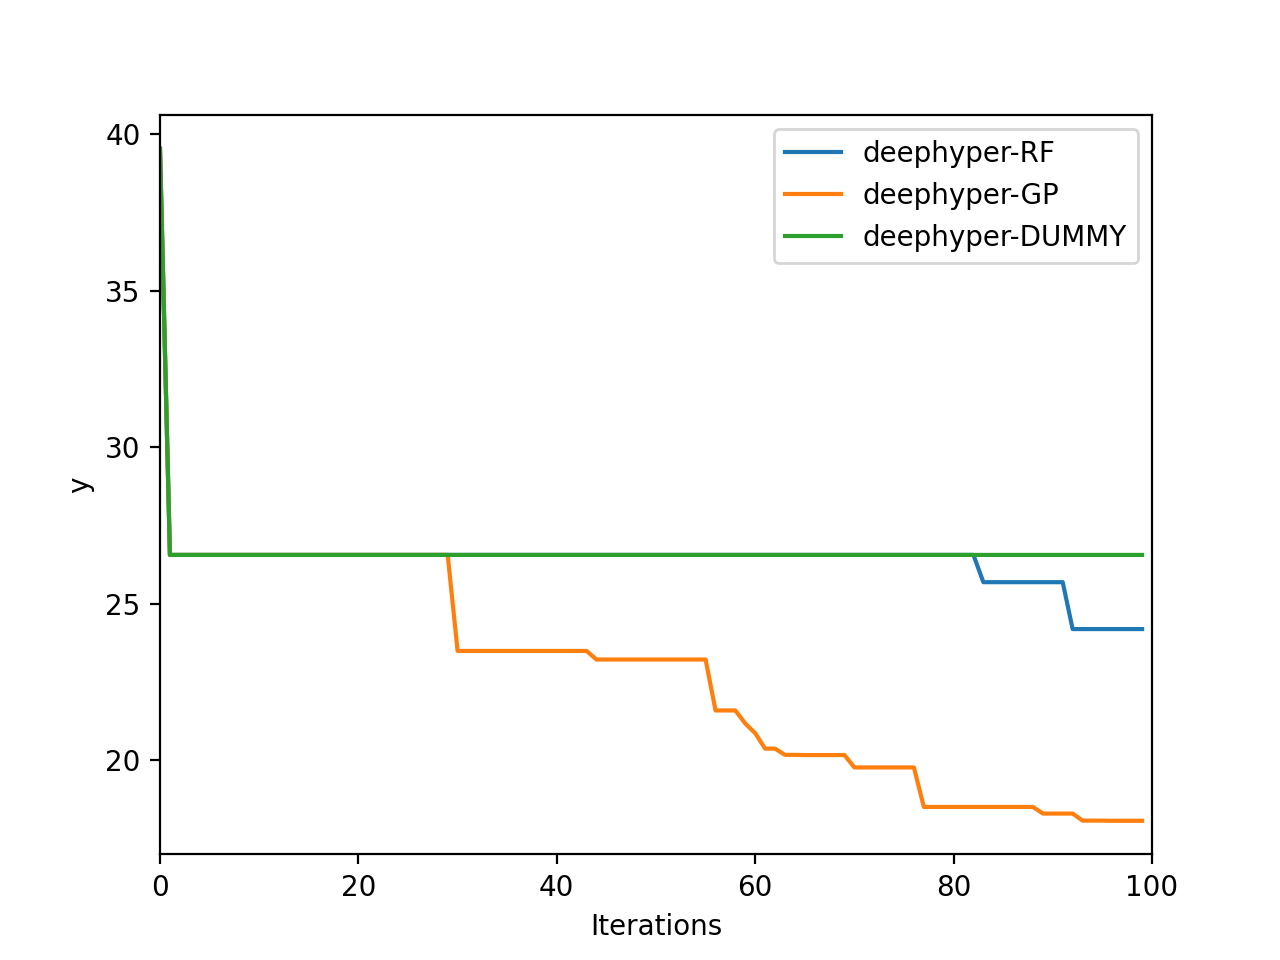

In [46]:
plt.figure()

for k, data in df.items():
    x = list(range(len(df[k]["objective"])))
    y = df[k]["objective"]
    plt.plot(x, best_objective(y), label=k)

plt.legend()
plt.xlim(0, 100)
plt.ylabel("y")
plt.xlabel("Iterations")
plt.show()

<IPython.core.display.Javascript object>


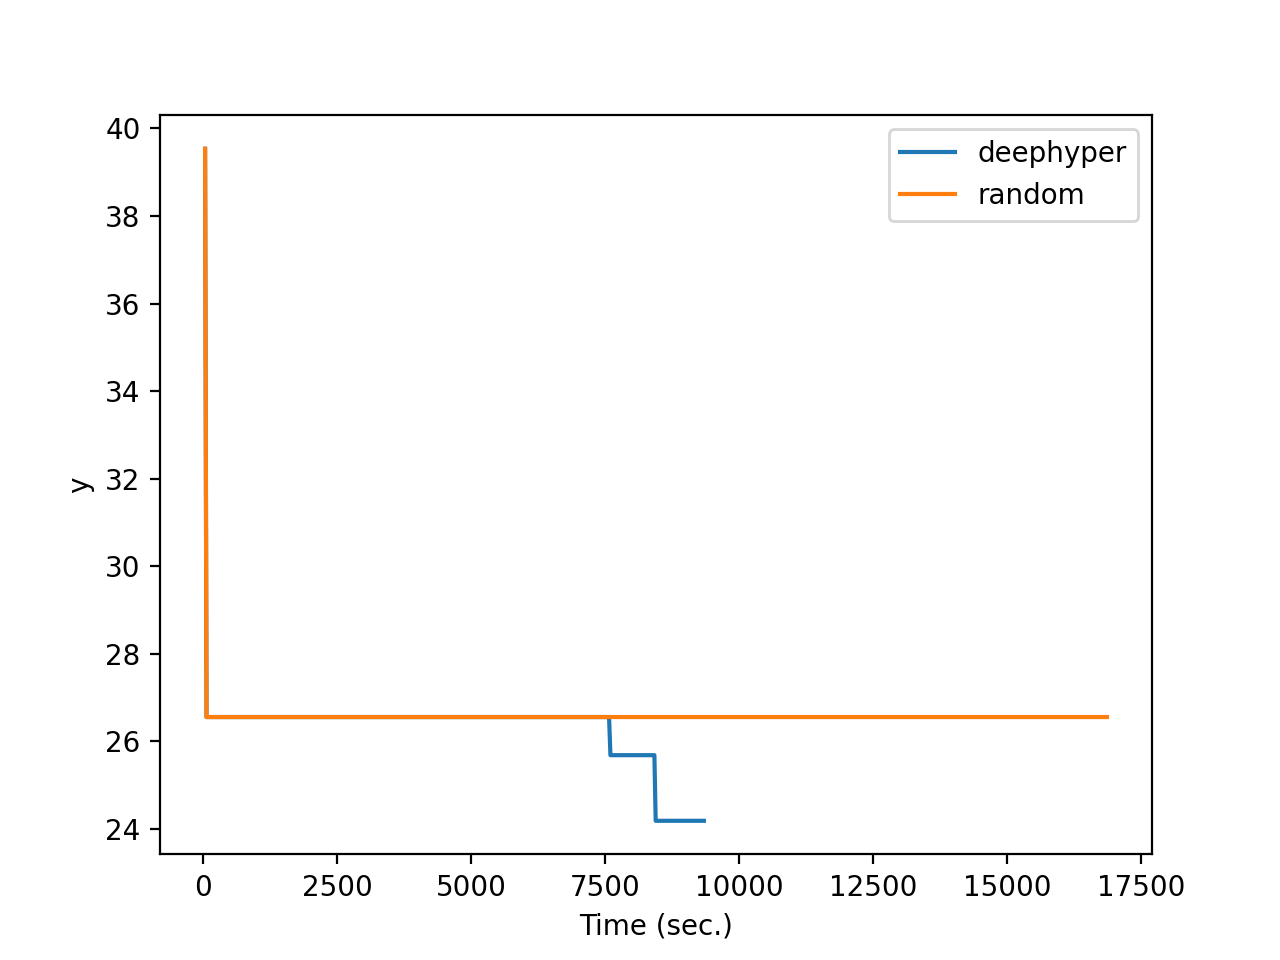

In [39]:
plt.figure()

for k, data in df.items():
    subdf = df[k].iloc[:100]
    x = subdf["objective"].cumsum()
    y = subdf["objective"]
    plt.plot(x, best_objective(y), label=k)

plt.legend()
plt.ylabel("y")
plt.xlabel("Time (sec.)")
plt.show()